In [1]:
from pydub import AudioSegment
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_path = "audio.m4a"
audio_format = "m4a"
sample_rate = 8000

# m4a 格式 -> wav 格式
audio = AudioSegment.from_file(audio_path, format=audio_format)
audio.export("voice.wav", format="wav")

# wav 格式 -> 采样率 8000
y, sr = librosa.load("voice.wav", sr=sample_rate)

print("y shape:", y.shape)
print("original sample rate:", sr)
print("resampled sample rate:", sample_rate)

y shape: (17750,)
original sample rate: 8000
resampled sample rate: 8000


In [3]:
def FFT(x):

    x = np.asarray(x, dtype=complex)
    N = len(x)
    assert N > 0 and (N & (N - 1)) == 0, "N must be a power of 2"
    
    if N <= 1:
        return x
    
    # X(k) = G(k) + e^(-2πk/N) H(k)
    G = FFT(x[0::2])     # g(r) = x(2r)
    H = FFT(x[1::2])      # h(r) = x(2r+1)
    
    # 旋转因子列表
    # W1, W2, ..., W(N/2-1)
    W = np.exp(-2j * np.pi * np.arange(N // 2) / N)
    
    # 
    X = np.zeros(N, dtype=complex)
    X[:N//2] = G + W * H
    X[N//2:] = G - W * H
    
    return X

​DFT:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2 \pi}{N} k n}
$$
IDFT:
$$
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{i \frac{2 \pi}{N} k n}
$$
Thus, we have
$$
FFT(\overline{X[k]}) = \sum_{n=0}^{N-1} \overline{x[n]} e^{-i \frac{2 \pi}{N} k n} = \overline{\sum_{n=0}^{N-1} X[k] e^{i \frac{2 \pi}{N} k n}} = \overline{N \cdot x[n]}

In [4]:
def IFFT(X):

    # X 的共轭
    X_bar = np.conjugate(X)
    
    # 利用 FFT 计算 IFFT
    result = FFT(X_bar)
    return np.conjugate(result) / len(X)

In [13]:
def FFT_freq(N, sample_rate):

    # 采样间隔
    dt = 1 / sample_rate

    # 频率列表
    freq = np.zeros(N)

    for k in range(N):
        if k < N // 2:
            freq[k] = k / (N * dt)          # 正频率
        else:
            freq[k] = (k - N) / (N * dt)    # 负频率

    return freq

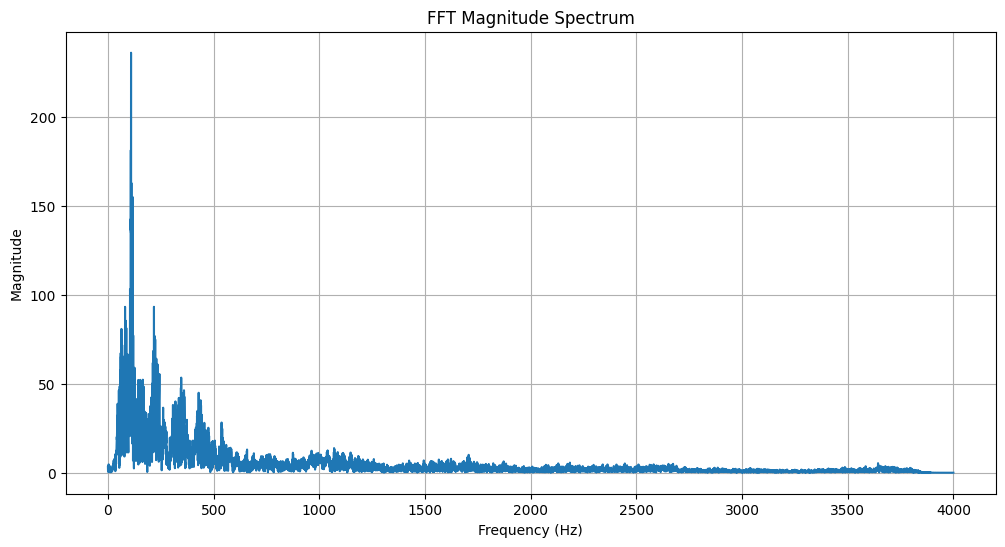

In [14]:
N = 16384                    # 窗口大小
audio_segment = y[:N]        # 取前 N 个采样点


FFT_result = FFT(audio_segment)
FFT_magnitude = np.abs(FFT_result)
FFT_freq = FFT_freq(N, sample_rate)

# 绘制频谱
plt.figure(figsize=(12, 6))
plt.plot(FFT_freq[:N//2], FFT_magnitude[:N//2])
plt.title("FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

Compare with numpy's FFT

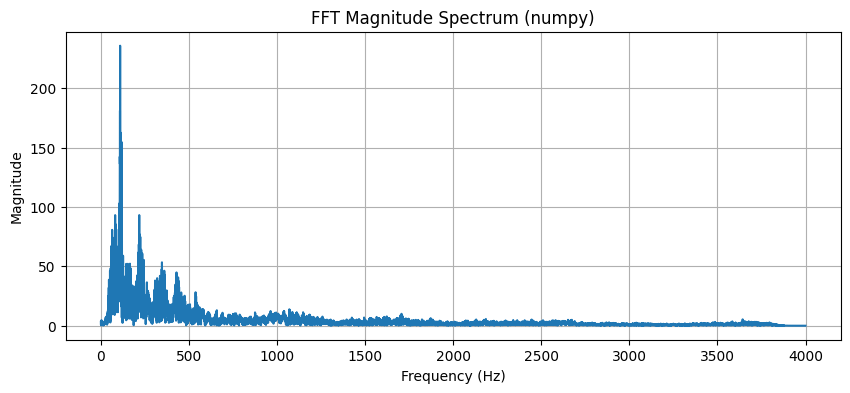

In [ ]:
# 计算 FFT
n_fft = 16384                           # FFT窗口大小
fft_result = np.fft.fft(y, n=n_fft)
fft_magnitude = np.abs(fft_result)      # 取幅度谱
frequencies = np.fft.fftfreq(n_fft, d=1/sample_rate)  # 频率轴

# 绘制频谱（仅正频率部分）
positive_freq = frequencies[:n_fft//2]
positive_magnitude = fft_magnitude[:n_fft//2]

plt.figure(figsize=(10, 4))
plt.plot(positive_freq, positive_magnitude)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT Magnitude Spectrum (numpy)")
plt.grid()
plt.show()